# Preparación del notebook

In [ ]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Carga de librerías funciones y paquetes
import numpy as np
import pygad
import matplotlib.pyplot as plt
import random
from matplotlib import animation, rc
from IPython.display import HTML
%matplotlib inline

# Elección de funciones

Codificación de las funciones:
*   Rosenbrock
*   Rastrigin

In [ ]:
#Con A=10
def rastrigin(x,solution_idx=None):
  z = 10 * len(x) + np.sum(x ** 2 - 10 * np.cos(2 * np.pi * x))
  fitness = -z
  return(fitness)

# #Con a=1,b=100
# def rosenbrock3d(x,solution_idx=None):
#   x1 = x[0]
#   x2 = x[1]
#   x3 = x[2]
#   factor1 = (x2-x1 ** 2) ** 2
#   factor2 = (1 -x1) ** 2
#   z = np.sum(100*factor1 + factor2)
#   fitness = -z
#   return(fitness)

#Con a=1,b=100
def rosenbrock3d(x,solution_idx=None):
  x1 = x[0]
  x2 = x[1]
  x3 = x[2]
  factor1 = 100*(x2-x1**2)**2 + (1-x1)**2
  factor2 = 100*(x3-x2**2)**2 + (1-x2)**2
  z = np.sum(factor1 + factor2)
  fitness = -z
  return(fitness)

# Decenso por gradiente

In [ ]:
#Cálculos numéricos aproximados de las derivadas parciales
def derivada_parcial(x,i,fun,h=0.01):
  e=np.zeros(len(x))
  e[i-1]=h
  z=(-fun(x+e)+fun(x-e))/(2*h)
  return(z)

#Vector con todas las derivadas parciales
def gradiente(x,fun,h=0.01):
  e=np.zeros(len(x))
  z=np.zeros(len(x))
  for i in range(len(x)):
    e[i]=h
    z[i]=(-fun(x+e)+fun(x-e))/(2*h)
    e[i]=0
  return(z)

In [ ]:
#Generacion de vectores aleatorios
def aleatorio(n,semilla,inicio,fin):
  random.seed(semilla)
  A=np.zeros(n)
  for i in range(n):
    A[i]=random.uniform(inicio,fin)
  return (A)

#Funcion de mejora
#Método de derivadas
#mu es el factor de aprendizaje
def improve1(x, fun, mu=0.001):
  grad=gradiente(x,fun)
  x=x-mu*grad
  return (x)

## Rastrigin

In [ ]:
soluciones=[]
x=aleatorio(2,1983,-5.12,5.12)
for epoch in range(50):
  x=improve1(x,rastrigin)
  soluciones.append(x)
#Gráfica de la función Rastrigin

In [ ]:
x=aleatorio(3,1983,-5.12,5.12)
soluciones=[x]
print("Inicio: ",x)
for epoch in range(50):
  x=improve1(x,rastrigin)
  soluciones.append(x)

print()
print("Aproximación final: ",soluciones[-1], " -> ",rastrigin(soluciones[-1]))

Inicio:  [4.91087532 2.50931992 2.57657364]

Aproximación final:  [4.97467467 1.98990562 2.98484575]  ->  -37.80815544952827


In [ ]:
# Gráfica de la función Rastrigin
ncols = 150
nrows = 150
X = np.linspace(-5.5, 5.5, ncols)     
Y = np.linspace(-5.5, 5.5, nrows) 
X, Y = np.meshgrid(X, Y) 

#minimo de x3
F1 = [-rastrigin(np.array([X[i,j], Y[i,j],soluciones[-1][2]])) for i in range(nrows) for j in range(ncols)]
F1 = np.array(F1).reshape([nrows,ncols])

#minimo de x2
F2 = [-rastrigin(np.array([X[i,j], Y[i,j],soluciones[-1][1]])) for i in range(nrows) for j in range(ncols)]
F2 = np.array(F2).reshape([nrows,ncols])

#minimo de x1
F3 = [-rastrigin(np.array([X[i,j], Y[i,j],soluciones[-1][0]])) for i in range(nrows) for j in range(ncols)]
F3 = np.array(F3).reshape([nrows,ncols])


for j in range(50):
  fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16, 4))

  #x1 vs x2
  ax1.contour(X,Y,F1,np.float16, levels = 50)
  ax1.plot(soluciones[j][0],soluciones[j][1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax1.plot(soluciones[j][0],soluciones[j][1],".",color="red",)
  ax1.set_xlabel('x1')
  ax1.set_ylabel('x2')
  ax1.set_title("x1 vs x2 ("+str(j)+")")

  #x1 vs x3
  ax2.contour(X,Y,F2, levels = 50)
  ax2.plot(soluciones[j][0],soluciones[j][2],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax2.plot(soluciones[j][0],soluciones[j][2],".",color="red",)
  ax2.set_xlabel('x1')
  ax2.set_ylabel('x3')
  ax2.set_title("x1 vs x3 ("+str(j)+")")

  #x3 vs x2
  ax3.contour(X,Y,F3, levels = 50)
  ax3.plot(soluciones[j][2],soluciones[j][1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax3.plot(soluciones[j][2],soluciones[j][1],".",color="red",)
  ax3.set_xlabel('x2')
  ax3.set_ylabel('x3')
  ax3.set_title("x3 vs x2 ("+str(j)+")")

  plt.subplots_adjust(wspace=0.5)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Rosenbrock


In [ ]:
x=aleatorio(3,1983,-2,2)
soluciones=[x]
print("Inicio: ",x)
for epoch in range(50):
  x=improve1(x,rosenbrock3d)
  soluciones.append(x)

print("Aproximación final: ",soluciones[-1], " -> ",rastrigin(soluciones[-1]))

Inicio:  [1.91831067 0.9802031  1.00647408]
Aproximación final:  [-0.78440574  0.625691    0.39479817]  ->  -43.95174156570528


In [ ]:
# Gráfica de la función Rosenbrock 
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 

#minimo de x3
F1 = [-rosenbrock3d(np.array([X[i,j], Y[i,j],soluciones[-1][2]])) for i in range(nrows) for j in range(ncols)]
F1 = np.array(F1).reshape([nrows,ncols])

#minimo de x2
F2 = [-rosenbrock3d(np.array([X[i,j], Y[i,j],soluciones[-1][1]])) for i in range(nrows) for j in range(ncols)]
F2 = np.array(F2).reshape([nrows,ncols])

#minimo de x1
F3 = [-rosenbrock3d(np.array([X[i,j], Y[i,j],soluciones[-1][0]])) for i in range(nrows) for j in range(ncols)]
F3 = np.array(F3).reshape([nrows,ncols])


for j in range(50):
  fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16, 4))

  #x1 vs x2
  ax1.contour(X,Y,F1,np.float16, levels = 50)
  ax1.plot(soluciones[j][0],soluciones[j][1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax1.plot(soluciones[j][0],soluciones[j][1],".",color="red",)
  ax1.set_xlabel('x1')
  ax1.set_ylabel('x2')
  ax1.set_title("x1 vs x2 ("+str(j)+")")

  #x1 vs x3
  ax2.contour(X,Y,F2, levels = 50)
  ax2.plot(soluciones[j][0],soluciones[j][2],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax2.plot(soluciones[j][0],soluciones[j][2],".",color="red",)
  ax2.set_xlabel('x1')
  ax2.set_ylabel('x3')
  ax2.set_title("x1 vs x3 ("+str(j)+")")

  #x3 vs x2
  ax3.contour(X,Y,F3, levels = 50)
  ax3.plot(soluciones[j][2],soluciones[j][1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax3.plot(soluciones[j][2],soluciones[j][1],".",color="red",)
  ax3.set_xlabel('x2')
  ax3.set_ylabel('x3')
  ax3.set_title("x3 vs x2 ("+str(j)+")")

  plt.subplots_adjust(wspace=0.3)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Algoritmos Evolutivos

## Rastrigin

In [ ]:
ga_instance_rastrigin = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=rastrigin,
                       sol_per_pop=10,
                       num_genes=3,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

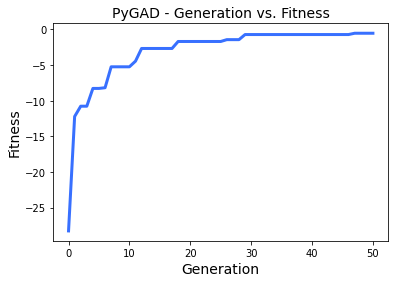

In [ ]:
ga_instance_rastrigin.run()
ga_instance_rastrigin.plot_fitness()
plt.show()
soluciones_rastrigin = ga_instance_rastrigin.solutions

In [ ]:
print("Aproximación final: ",soluciones_rastrigin[-1], " -> ",rastrigin(np.array(soluciones_rastrigin[-1])))

Aproximación final:  [0.7943304945124976, 0.012130998496481915, 0.03459837405727417]  ->  -8.147207639262877


In [ ]:
# Gráfica de la función Rastrigin
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 


#minimo de x3
F1 = [-rastrigin(np.array([X[i,j], Y[i,j],soluciones_rastrigin[-1][2]])) for i in range(nrows) for j in range(ncols)]
F1 = np.array(F1).reshape([nrows,ncols])

#minimo de x2
F2 = [-rastrigin(np.array([X[i,j], Y[i,j],soluciones_rastrigin[-1][1]])) for i in range(nrows) for j in range(ncols)]
F2 = np.array(F2).reshape([nrows,ncols])

#minimo de x1
F3 = [-rastrigin(np.array([X[i,j], Y[i,j],soluciones_rastrigin[-1][0]])) for i in range(nrows) for j in range(ncols)]
F3 = np.array(F3).reshape([nrows,ncols])


for j in range(50):
  Pob = np.array(soluciones_rastrigin[j*8:(j+1)*8])
  fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16, 4))

  #x1 vs x2
  ax1.contour(X,Y,F1,np.float16, levels = 50)
  ax1.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax1.plot(Pob[:,0],Pob[:,1],".",color="red",)
  ax1.set_xlabel('x1')
  ax1.set_ylabel('x2')
  ax1.set_title("x1 vs x2 (Gen"+str(j)+")")

  #x1 vs x3
  ax2.contour(X,Y,F2, levels = 50)
  ax2.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax2.plot(Pob[:,0],Pob[:,1],".",color="red",)
  ax2.set_xlabel('x1')
  ax2.set_ylabel('x3')
  ax2.set_title("x1 vs x3 (Gen "+str(j)+")")

  #x3 vs x2
  ax3.contour(X,Y,F3, levels = 50)
  ax3.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax3.plot(Pob[:,0],Pob[:,1],".",color="red",)
  ax3.set_xlabel('x2')
  ax3.set_ylabel('x3')
  ax3.set_title("x3 vs x2 (Gen "+str(j)+")")

  plt.subplots_adjust(wspace=0.3)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

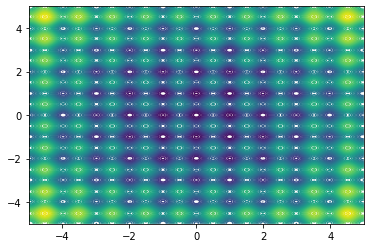

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5, 5))
ax.contour(X,Y,Z, levels = 50)
plot, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    plot.set_data([], [])
    return (plot,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_rastrigin[i*8:(i+1)*8])
    plot.set_data(Pob[:,0],Pob[:,1])
    return (plot,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

HTML(anim.to_html5_video())

## Rosenbrock

In [ ]:
ga_instance_rosenbrock3d = pygad.GA(num_generations=50,
                       num_parents_mating=2,
                       fitness_func=rosenbrock3d,
                       sol_per_pop=10,
                       num_genes=3,
                       init_range_low=-5,
                       init_range_high=5,
                       parent_selection_type="sss",
                       keep_parents=1,
                       crossover_type="single_point",
                       mutation_type="random",
                       mutation_percent_genes=10,
                       save_solutions=True)

/usr/local/lib/python3.9/dist-packages/pygad/pygad.py:522: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))
/usr/local/lib/python3.9/dist-packages/pygad/pygad.py:940: UserWarning: Use the 'save_solutions' parameter with caution as it may cause memory overflow when either the number of generations, number of genes, or number of solutions in population is large.
  if not self.suppress_warnings: warnings.warn("Us

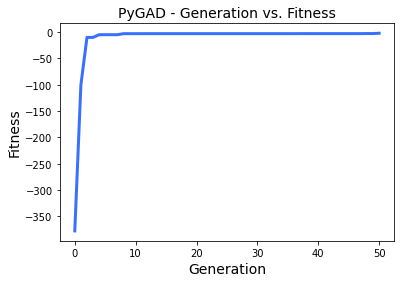

In [ ]:
#Ejecutamos la optimización
ga_instance_rosenbrock3d.run()
ga_instance_rosenbrock3d.plot_fitness()
plt.show()
soluciones_rosenbrock3d = ga_instance_rosenbrock3d.solutions

In [ ]:
# Gráfica de la función Rosenbrock
ncols = 150
nrows = 150
X = np.linspace(-5, 5, ncols)     
Y = np.linspace(-5, 5, nrows)     
X, Y = np.meshgrid(X, Y) 


#minimo de x3
F1 = [-rosenbrock3d(np.array([X[i,j], Y[i,j],soluciones_rosenbrock3d[-1][2]])) for i in range(nrows) for j in range(ncols)]
F1 = np.array(F1).reshape([nrows,ncols])

#minimo de x2
F2 = [-rosenbrock3d(np.array([X[i,j], Y[i,j],soluciones_rosenbrock3d[-1][1]])) for i in range(nrows) for j in range(ncols)]
F2 = np.array(F2).reshape([nrows,ncols])

#minimo de x1
F3 = [-rosenbrock3d(np.array([X[i,j], Y[i,j],soluciones_rosenbrock3d[-1][0]])) for i in range(nrows) for j in range(ncols)]
F3 = np.array(F3).reshape([nrows,ncols])


for j in range(50):
  Pob = np.array(soluciones_rosenbrock3d[j*8:(j+1)*8])
  fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16, 4))

  #x1 vs x2
  ax1.contour(X,Y,F1,np.float16, levels = 50)
  ax1.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax1.plot(Pob[:,0],Pob[:,1],".",color="red",)
  ax1.set_xlabel('x1')
  ax1.set_ylabel('x2')
  ax1.set_title("x1 vs x2 (Gen "+str(j)+")")

  #x1 vs x3
  ax2.contour(X,Y,F2, levels = 50)
  ax2.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax2.plot(Pob[:,0],Pob[:,1],".",color="red",)
  ax2.set_xlabel('x1')
  ax2.set_ylabel('x3')
  ax2.set_title("x1 vs x3 (Gen "+str(j)+")")

  #x3 vs x2
  ax3.contour(X,Y,F3, levels = 50)
  ax3.plot(Pob[:,0],Pob[:,1],"o",color="red",fillstyle="none",markersize=11,markeredgewidth=2)
  ax3.plot(Pob[:,0],Pob[:,1],".",color="red",)
  ax3.set_xlabel('x2')
  ax3.set_ylabel('x3')
  ax3.set_title("x3 vs x2 (Gen "+str(j)+")")

  plt.subplots_adjust(wspace=0.3)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

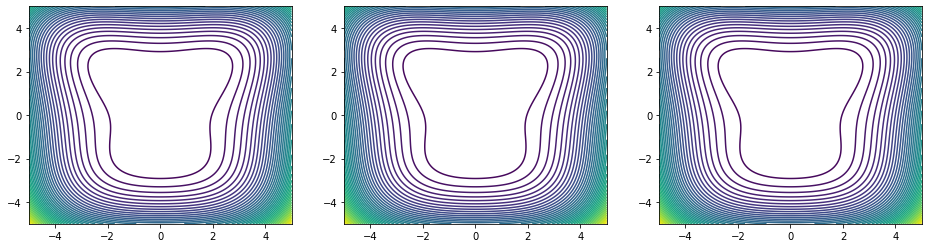

In [246]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3,figsize=(16, 4))

ax1.set_xlim(( -5, 5))
ax1.set_ylim((-5, 5))
ax1.contour(X,Y,F1, levels = 50)
scatter, = ax1.plot([], [], lw=2)

ax2.set_xlim(( -5, 5))
ax2.set_ylim((-5, 5))
ax2.contour(X,Y,F1, levels = 50)
scatter, = ax2.plot([], [], lw=2)


ax3.set_xlim(( -5, 5))
ax3.set_ylim((-5, 5))
ax3.contour(X,Y,F1, levels = 50)
scatter, = ax3.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    plot.set_data([], [])
    return (scatter,)

In [247]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_rosenbrock3d[i*8:(i+1)*8])
    scatter.set_data(Pob[:,0],Pob[:,1])
    # scatter.set_offsets(Pob)
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

HTML(anim.to_html5_video())

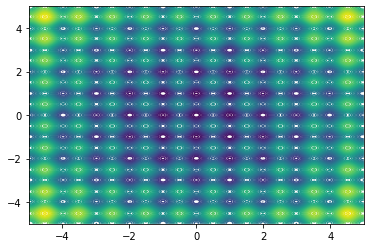

In [ ]:
fig, ax = plt.subplots()

ax.set_xlim(( -5, 5))
ax.set_ylim((-5, 5))
ax.contour(X,Y,Z, levels = 50)
scatter, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    plot.set_data([], [])
    return (scatter,)

In [ ]:
# animation function. This is called sequentially
def animate(i):
    Pob = np.array(soluciones_rastrigin[i*8:(i+1)*8])
    scatter.set_data(Pob[:,0],Pob[:,1])
    # scatter.set_offsets(Pob)
    return (scatter,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=100, blit=True)

HTML(anim.to_html5_video())